In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

seed = 999
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train[:5000,:]
y_train = y_train[:5000]
X_test = X_test[:500,:]
y_test = y_test[:500]
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((5000, 28, 28), (5000,), (500, 28, 28), (500,))

- 전처리
    - 색상 차원 추가 필요
    - 정규화 (0.0~1.0사이로 변환)

In [4]:
X_train =X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train.shape,X_test.shape

((5000, 28, 28, 1), (500, 28, 28, 1))

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

- 라벨 데이터 원핫 인코딩

In [6]:
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

y_train_en.shape,y_test_en.shape

((5000, 10), (500, 10))

- 신경망 설계
    - CNN(특성 추출기) + Flatten(1차원 변환) + Dense(분류기)

In [8]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten

In [9]:
m1 = Sequential()
# 특성 추출기 층
# filters : 필터의 개수
# kernel_size : 필터의크기
# input_shape : 입력데이터 크기
# padding : same - 크기유지
# activation : 활성화 함수
m1.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(28,28,1),
                activation="relu",padding="same"))

# pool_size : 풀링 크기
m1.add(MaxPooling2D(pool_size=(2,2)))

# 1차원 변환
m1.add(Flatten())

# 특성 분류기 층
m1.add(Dense(units=512,input_dim=28*28,activation="relu"))
m1.add(Dense(units=32,activation="relu"))
m1.add(Dense(units=10,activation="softmax"))
m1.summary()

c:\Users\SMHRD\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,842 (12.32 MB)

 Trainable params: 3,228,842 (12.32 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [11]:
filename = "./model/mnist_best_{epoch:03d}_{loss:.3f}_{val_loss:.3f}.keras"
mc = ModelCheckpoint(filepath=filename,monitor="val_loss",save_best_only=True)
es = EarlyStopping(monitor="val_loss", patience=5)

In [13]:
m1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
h1 = m1.fit(X_train,y_train_en,batch_size=128,epochs=30,validation_split=0.2,callbacks=[mc,es])

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5759 - loss: 1.3999 - val_accuracy: 0.8760 - val_loss: 0.3998
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9010 - loss: 0.3230 - val_accuracy: 0.8870 - val_loss: 0.3490
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9219 - loss: 0.2432 - val_accuracy: 0.9300 - val_loss: 0.2363
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9630 - loss: 0.1344 - val_accuracy: 0.9390 - val_loss: 0.2210
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9734 - loss: 0.0927 - val_accuracy: 0.9450 - val_loss: 0.2013
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9846 - loss: 0.0615 - val_accuracy: 0.9410 - val_loss: 0.1948
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9887 - loss: 0.0468 - val_accuracy: 0.9330 - val_loss: 0.2156
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9930 - loss: 0.0362 - val_accuracy: 0.9430 - v

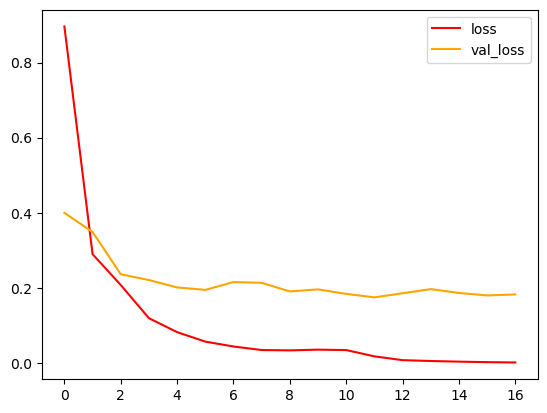

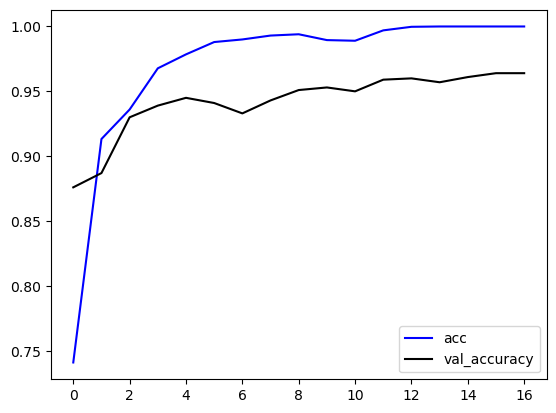

In [14]:
plt.plot(h1.history["loss"],color='r',label="loss")
plt.plot(h1.history["val_loss"],color="orange",label="val_loss")
plt.legend()
plt.show()
plt.plot(h1.history["accuracy"],color='b',label="acc")
plt.plot(h1.history["val_accuracy"],color="black",label="val_accuracy")
plt.legend()
plt.show()